# Matplotlib Problem Set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

#### Below is the temperature in degrees Celsius for this day (July 10) in Boston from 1961 to 2010. Plot the temperature on the Y-Axis

In [2]:
temp_boston = [17.8, 22.8, 17.5, 16.4, 23.35, 25.3, 27.25, 24.45, 22.5, 23.6, 26.7, 22.75, 21.95, 26.4,
23.05, 22.5, 21.1, 26.1, 23.9, 20.25, 27.8, 23.9, 21.7, 19.7, 25.0, 21.4, 21.1, 27.8, 22.25, 27.25, 
23.35, 25.0, 30.0, 25.8, 23.6, 22.5,19.15, 22.8, 23.6, 25.0, 20.8, 21.4, 18.6, 23.05, 25.0, 25.0,
18.35, 25.3, 18.6]
len(temp_boston)

49

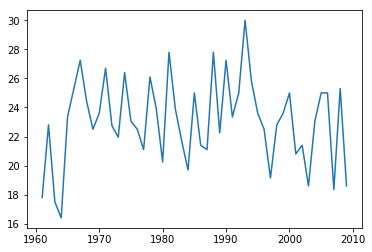

In [3]:
## YOUR CODE HERE
plt.plot(list(range(1961,2010)), temp_boston)
plt.show()

#### Below is the temperature in degrees Celsius for this day (July 10) in New York from 1961 to 2010. Plot the temperatures of New York and Boston on the same graph in different colors

In [4]:
temp_new_york =[23.35, 25.25, 20.25, 22.25, 25.85, 25.85, 25.55, 24.2, 22.5, 23.9, 28.3, 22.8, 26.7,
29.7, 23.6, 22.8, 23.05, 26.7, 20.3, 23.65, 28.05, 25.0, 21.4, 21.35, 26.1, 25.25, 28.35, 25.85, 27.5,
26.4, 21.7, 27.2, 32.25, 28.3, 22.5, 23.05, 22.8, 25.0, 24.7, 27.5, 25.85, 24.45, 20.0, 24.15, 26.95,
22.5, 25.85, 27.25, 19.4]

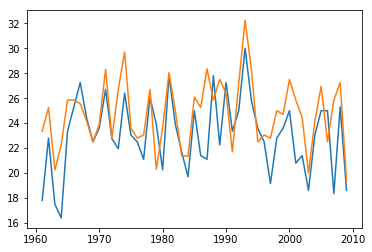

In [5]:
## YOUR CODE HERE
plt.plot(list(range(1961,2010)), temp_boston, list(range(1961,2010)), temp_new_york)
plt.show()

#### Plot the temperatures of New York and Boston on different graphs in the same figure¶

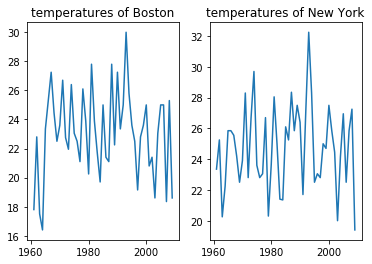

In [6]:
## YOUR CODE HERE
year = list(range(1961,2010))

plt.subplot(1,2,1)
plt.plot(year, temp_boston)
plt.title("temperatures of Boston")
plt.subplot(1,2,2)
plt.plot(year, temp_new_york)
plt.title("temperatures of New York")
plt.show()

### Univariate Analysis:

In [7]:
"""Let's revisit the Dataset_1 again. Read the csv file https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv into a dataframe
and print the first 7 rows"""

## YOUR CODE HERE
import io
import requests

url = "https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [8]:
print(data.head(7))

   SubjectID  Year  Sex  Age  Ethnicity  ParentEducation  MaritalStatus  \
0          1     6    1   49          3                5              1   
1          2     2    1   37          3                4              5   
2          3     1    1   70          1                1              1   
3          4     6    2   38          3                5              3   
4          5     2    2   85          4                1              2   
5          6     6    2   23          1                1              6   
6          7     5    2   53          3                3              1   

   HouseIncome  Protein    Carb  ...     Chol      VitA    VitC  Weight  \
0           11    97.13  253.98  ...   180.57  10292.63  112.19    92.5   
1           11   130.02  309.57  ...  1242.06   4181.03   70.96    99.2   
2            3    67.01  268.23  ...    37.41  36792.50   78.51    63.6   
3            8    82.66  264.69  ...   596.30   3075.79   36.11    81.6   
4            1    39.62 

In [ ]:
"""Conduct a Univariate Analysis of the participants' Cholesterol. What is noticeable about it? Create a function
that makes the participants' Cholesterol more Normal and create two visualizations, 
one before the Chol data is modified, and one after Chol data is nmodified to be more Normal than before."""

## YOUR CODE HERE

from sklearn import preprocessing 

def more_Normal(dataframe, column): 
    y = pd.DataFrame.copy(dataframe)
# Create x, where x the 'scores' column's values as floats
    x = dataframe[[column]].values.astype(float)
# Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)
# Run the normalizer on the dataframe
    y[column] = pd.DataFrame(x_scaled)
    return y

plt.boxplot(more_Normal(data,"Chol"))
plt.hist(more_Normal(data,"Chol")) #better representation of data, more Normal than before, now not as strongly skewed

#Hint: which data visualization shows the outliers?

(array([368., 731., 621., 423., 250., 213., 169., 138.,  82.,  51.]),
 array([  0.   ,  77.477, 154.954, 232.431, 309.908, 387.385, 464.862,
        542.339, 619.816, 697.293, 774.77 ]),
 <a list of 10 Patch objects>)

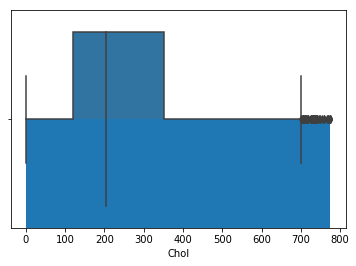

In [10]:
def more_Normal(dataframe, column): 
    ## YOUR CODE HERE
    data = dataframe[column];
    bound = data.quantile(.75)*2.5-data.quantile(.25)*1.5
    return data[data < bound]
sns.boxplot(more_Normal(data,"Chol"))
plt.hist(more_Normal(data,"Chol")) #better representation of data, more Normal than before, now not as strongly skewed


{'whiskers': [<matplotlib.lines.Line2D at 0x1a185c6390>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x1a185c6a20>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x1a1830bf60>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x1a185c6e48>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x1a185d0438>,
  ...],
 'means': []}

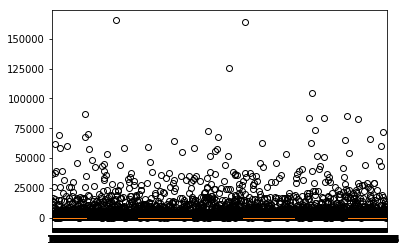

In [11]:
plt.boxplot(data, "Chol")

In [ ]:
"""Conduct a Bivariate Analysis for Protein and Chol. What is familar about this compared to the tutorial? What is another 
way to deal with overplotting other than the Hex plot? Create two data visualizations, one that shows the overplotting, the other that 
resolves this issue. After you are done, play around with the sns.kdeplot function or try to create a 3D graph to reduce the effects of overplotting."""

## YOUR CODE HERE

In [ ]:
sns.kdeplot(data["Protein"], data["Chol"], cmap="Reds", shade=True, clip=(2000, 250))